<a href="https://colab.research.google.com/github/DattaIn/idatta.github.io/blob/master/Customer_Segmentation_Kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Certification Program in Computational Data Science

##  A program by IISc and TalentSprint

### Mini Project Notebook: Customer segmentation using clustering

## Learning Objectives

At the end of the experiment, you will be able to :

* extract summary level insight from a given customer dataset.

* handle the missing data and identify the underlying pattern or structure of the data.

* create an unsupervised model that generates the optimum number of segments for the customer base

* identify customer segments based on the overall buying behaviour


## Dataset

The dataset chosen for this mini project is the Online Retail dataset. It is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.

The dataset contains 541909 records, and each record is made up of 8 fields.

To know more about the dataset : [click here](https://archive.ics.uci.edu/ml/datasets/Online+Retail)

## Information

**Clustering** is the task of grouping together a set of objects so that the objects in the same cluster are more similar to each other than to objects in other clusters. Similarity is a measure that reflects the strength of the relationship between two data objects.

In the clustering calculation, K-Means is a very popular algorithm. In this analysis, this method is used to cluster the similar data items.

In Retail and E-Commerce (B2C), and more broadly in B2B, one of the key elements shaping the business strategy of a firm is understanding of customer behaviour. More specifically, understanding the customers based on different business metrics: how much they spend (revenue), how often they spend (frequency), are they new or existing customers, what are their favorite products, etc... Such understanding in turn helps direct marketing, sales, account management and product teams to support customers on a personalized level and improve the product offering.

Furthermore, segmenting customers into different categories based on similar/cyclical buying pattern over a period of 1 year helps the retail shops manage their inventory better, thereby lowering costs and raising revenues by placing the orders in sync with the buying cycles.

## Problem Statement

Perform customer segmentation for an Online Retail using an Unsupervised Clustering technique (K-Means)

### Import Required packages

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy
from scipy import stats
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

## Data Wrangling

In [ ]:
#@title Download the data
!wget -qq https://cdn.iisc.talentsprint.com/CDS/MiniProjects/Online_Retail.zip
!unzip -qq Online_Retail.zip

## Load the data

In [ ]:
# YOUR CODE HERE
train_df = pd.read_csv('/content/Online_Retail_Train.csv')
test_df = pd.read_csv('/content/Online_Retail_Test.csv')

In [ ]:
train_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,579427,22636,CHILDS BREAKFAST SET CIRCUS PARADE,2,2011-11-29 13:04:00,8.50,16479.0,United Kingdom
1,554092,21916,SET 12 RETRO WHITE CHALK STICKS,24,2011-05-22 12:41:00,0.42,17176.0,United Kingdom
2,577774,84692,BOX OF 24 COCKTAIL PARASOLS,6,2011-11-21 15:57:00,0.42,16712.0,United Kingdom
3,C571196,23350,ROLL WRAP VINTAGE SPOT,-12,2011-10-14 12:02:00,1.25,NaN,United Kingdom
4,546649,84509a,SET OF 4 ENGLISH ROSE PLACEMATS,1,2011-03-15 14:17:00,7.46,NaN,United Kingdom


In [ ]:
test_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,555200,71459,HANGING JAM JAR T-LIGHT HOLDER,24,2011-06-01 12:05:00,0.85,17315.0,United Kingdom
1,554974,21128,GOLD FISHING GNOME,4,2011-05-27 17:14:00,6.95,14031.0,United Kingdom
2,550972,21086,SET/6 RED SPOTTY PAPER CUPS,4,2011-04-21 17:05:00,0.65,14031.0,United Kingdom
3,576652,22812,PACK 3 BOXES CHRISTMAS PANETTONE,3,2011-11-16 10:39:00,1.95,17198.0,United Kingdom
4,546157,22180,RETROSPOT LAMP,2,2011-03-10 08:40:00,9.95,13502.0,United Kingdom


In [ ]:
train_df.describe()

,Quantity,UnitPrice,CustomerID
count,514813.000000,514813.000000,386550.000000
mean,9.552498,4.586406,15288.936753
std,223.529242,95.660226,1713.565852
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13955.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [ ]:
test_df.describe()

,Quantity,UnitPrice,CustomerID
count,27096.000000,27096.000000,20279.000000
mean,9.547535,5.080545,15263.936338
std,42.986573,115.684282,1714.125912
min,-2376.000000,0.000000,12347.000000
25%,1.000000,1.250000,13924.000000
50%,3.000000,2.100000,15079.000000
75%,10.000000,4.130000,16768.500000
max,2880.000000,13541.330000,18287.000000


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 514813 entries, 0 to 514812
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    514813 non-null  object 
 1   StockCode    514813 non-null  object 
 2   Description  513428 non-null  object 
 3   Quantity     514813 non-null  int64  
 4   InvoiceDate  514813 non-null  object 
 5   UnitPrice    514813 non-null  float64
 6   CustomerID   386550 non-null  float64
 7   Country      514813 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 31.4+ MB


In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27096 entries, 0 to 27095
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    27096 non-null  object 
 1   StockCode    27096 non-null  object 
 2   Description  27027 non-null  object 
 3   Quantity     27096 non-null  int64  
 4   InvoiceDate  27096 non-null  object 
 5   UnitPrice    27096 non-null  float64
 6   CustomerID   20279 non-null  float64
 7   Country      27096 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 1.7+ MB


In [ ]:
C = train_df[train_df['InvoiceNo'].str.startswith('C')]
C = C.drop(C[C['CustomerID'].isnull()].index)

In [ ]:
C

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
34,C578367,22759,SET OF 3 NOTEBOOKS IN PARCEL,-12,2011-11-24 11:00:00,1.65,14640.0,United Kingdom
121,C573010,20979,36 PENCILS TUBE RED RETROSPOT,-11,2011-10-27 12:29:00,1.25,13735.0,United Kingdom
219,C570828,90059E,DIAMANTE HAIR GRIP PACK/2 RUBY,-6,2011-10-12 13:15:00,1.65,14911.0,EIRE
220,C563693,84050,PINK HEART SHAPE EGG FRYING PAN,-1,2011-08-18 13:04:00,1.65,17243.0,United Kingdom
242,C579926,20727,LUNCH BAG BLACK SKULL.,-2,2011-12-01 09:19:00,1.65,14389.0,United Kingdom
...,...,...,...,...,...,...,...,...
514660,C574954,22720,SET OF 3 CAKE TINS PANTRY DESIGN,-3,2011-11-08 09:52:00,4.95,18223.0,United Kingdom
514692,C554029,22423,REGENCY CAKESTAND 3 TIER,-1,2011-05-20 13:54:00,12.75,12681.0,France
514696,C552805,21155,RED RETROSPOT PEG BAG,-6,2011-05-11 12:34:00,2.55,14149.0,United Kingdom
514700,C546870,M,Manual,-2,2011-03-17 16:07:00,2.50,14462.0,United Kingdom


In [ ]:
a = train_df[train_df['CustomerID']==18223]
a = a[a['StockCode']=='22720']
a

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
60628,560577,22720,SET OF 3 CAKE TINS PANTRY DESIGN,12,2011-07-19 15:07:00,4.95,18223.0,United Kingdom
87555,573420,22720,SET OF 3 CAKE TINS PANTRY DESIGN,6,2011-10-31 09:48:00,4.95,18223.0,United Kingdom
186213,C561604,22720,SET OF 3 CAKE TINS PANTRY DESIGN,-3,2011-07-28 12:08:00,4.95,18223.0,United Kingdom
245750,545014,22720,SET OF 3 CAKE TINS PANTRY DESIGN,6,2011-02-25 13:15:00,4.95,18223.0,United Kingdom
287977,C557876,22720,SET OF 3 CAKE TINS PANTRY DESIGN,-2,2011-06-23 13:10:00,4.95,18223.0,United Kingdom
325057,557476,22720,SET OF 3 CAKE TINS PANTRY DESIGN,6,2011-06-20 13:41:00,4.95,18223.0,United Kingdom
327107,580543,22720,SET OF 3 CAKE TINS PANTRY DESIGN,6,2011-12-05 09:11:00,4.95,18223.0,United Kingdom
514660,C574954,22720,SET OF 3 CAKE TINS PANTRY DESIGN,-3,2011-11-08 09:52:00,4.95,18223.0,United Kingdom


In [ ]:
A = train_df[train_df['InvoiceNo'].str.startswith('A')]
# C = C.drop(C[C['CustomerID'].isnull()].index)
A

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
51050,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom
279008,A563185,B,Adjust bad debt,1,2011-08-12 14:50:00,11062.06,NaN,United Kingdom
405078,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom


In [ ]:
C['CustomerID'] = C['CustomerID'].astype(str)

In [ ]:
C.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8434 entries, 34 to 514745
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    8434 non-null   object 
 1   StockCode    8434 non-null   object 
 2   Description  8434 non-null   object 
 3   Quantity     8434 non-null   int64  
 4   InvoiceDate  8434 non-null   object 
 5   UnitPrice    8434 non-null   float64
 6   CustomerID   8434 non-null   object 
 7   Country      8434 non-null   object 
dtypes: float64(1), int64(1), object(6)
memory usage: 593.0+ KB


## Data Pre-processing (2 points)

Explore the dataset by performing the following operations:

* There is a lot of redundant data. Identify such data and take appropriate action.

  **Hint:** refer to this [link](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop_duplicates.html)

* Most Invoices appear as normal transactions with positive quantity and prices, but there are some prefixed with "C" or "A" which denote different transaction types. Invoice starting with C represents cancelled order and A represents the Adjusted. Identify such data and take appropriate action.

  **Hint:** Check the negative values in Quantity column for all cancelled orders

* Handle the null values by dropping or filling with appropriate mean


* Some of the transactions based on the `StockCode` variable are not actually products, but representing the costs or fees regarding to the post or bank or other tansactions. Find such data and handle it accordingly.

  Hint:
    - The transaction with `'POST' 'PADS' 'M' 'DOT' 'C2' 'BANK CHARGES'` as their `StockCodes` are considered as irrelevant transactions.

* Identify the outliers in the UntiPrice and Quantity and handle them accordingly.

  **Hint:** [link](https://kanoki.org/2020/04/23/how-to-remove-outliers-in-python/)

* Create a DayOfWeek column using `InvoiceDate`, Hint: pd.to_datetime()

**Note:** Perform all the above operations using a function to reuse and apply the same for test data.

In [ ]:
non_sales = ['POST', 'PADS', 'M', 'DOT', 'C2', 'BANK CHARGES']

def clean_data(df):
  #remove duplicates
  df = df.drop_duplicates()

  # remove cancellation and adjustment entries
  df = df.drop(df[df['InvoiceNo'].str.startswith('C')].index)
  df = df.drop(df[df['InvoiceNo'].str.startswith('A')].index)

  #fill empty description and customer ID will non-descript values
  df['Description'].fillna('No description available', inplace = True)

  # drop all null values in Customer ID
  df = df.dropna(subset=['CustomerID'])
  df['CustomerID'] = df['CustomerID'].astype(str)

  # remove all entries with negative quantity
  df = df.drop(df[df['Quantity'] <= 0].index)

  # remove all non-sales related incidental transactions
  df = df.drop(df[df['StockCode'].isin(non_sales)].index)

  # find z-score on unit price & quantity and remove outliers beyond 3-sigma
  df['z_score_price']=stats.zscore(df['UnitPrice'])
  df['z_score_qty']=stats.zscore(df['Quantity'])

  df = df.drop(df[df['z_score_price'].abs()>3].index)
  del df['z_score_price']

  df = df.drop(df[df['z_score_qty'].abs()>3].index)
  del df['z_score_qty']

  # create day of the week column
  df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
  df['DayOfWeek'] = df['InvoiceDate'].dt.weekday

  # consider including month, if needed

  return df

In [ ]:
cdf_train = clean_data(train_df)
cdf_test = clean_data(test_df)

In [ ]:
cdf_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 369445 entries, 0 to 514812
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    369445 non-null  object        
 1   StockCode    369445 non-null  object        
 2   Description  369445 non-null  object        
 3   Quantity     369445 non-null  int64         
 4   InvoiceDate  369445 non-null  datetime64[ns]
 5   UnitPrice    369445 non-null  float64       
 6   CustomerID   369445 non-null  object        
 7   Country      369445 non-null  object        
 8   DayOfWeek    369445 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(5)
memory usage: 28.2+ MB


In [ ]:
cdf_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19373 entries, 0 to 27095
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    19373 non-null  object        
 1   StockCode    19373 non-null  object        
 2   Description  19373 non-null  object        
 3   Quantity     19373 non-null  int64         
 4   InvoiceDate  19373 non-null  datetime64[ns]
 5   UnitPrice    19373 non-null  float64       
 6   CustomerID   19373 non-null  object        
 7   Country      19373 non-null  object        
 8   DayOfWeek    19373 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(5)
memory usage: 1.5+ MB


In [ ]:
cdf_train.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,DayOfWeek,Month,NoSales,TotalAmount,SaleAmount
0,579427,22636,CHILDS BREAKFAST SET CIRCUS PARADE,2,2011-11-29 13:04:00,8.50,16479.0,United Kingdom,1,11,1,17.00,17.00
1,554092,21916,SET 12 RETRO WHITE CHALK STICKS,24,2011-05-22 12:41:00,0.42,17176.0,United Kingdom,6,5,1,10.08,10.08
2,577774,84692,BOX OF 24 COCKTAIL PARASOLS,6,2011-11-21 15:57:00,0.42,16712.0,United Kingdom,0,11,1,2.52,2.52
5,579668,23575,SNACK TRAY PAISLEY PARK,8,2011-11-30 12:32:00,1.95,15152.0,United Kingdom,2,11,1,15.60,15.60
7,547684,23176,ABC TREASURE BOOK BOX,8,2011-03-24 14:46:00,2.25,12408.0,Belgium,3,3,1,18.00,18.00


## Understanding new insights from the data (1 point)

1.  Are there any free items in the data? How many are there?

2.  Find the number of transactions per country and visualize using an appropriate plot

3.  What is the ratio of customers who are repeat purchasers vs single-time purchasers? Visualize using an appropriate plot.

4. Plot heatmap showing unit price per month and day of the week

  **Hint:** Month name as index on Y-axis, Day of the week on X-axis

5. Find the top 10 customers who bought the most no.of items. Also find the top 10 Items bought by most no.of customers.

In [ ]:
free_items_train = cdf_train[cdf_train['UnitPrice']==0]
free_items_test = cdf_test[cdf_test['UnitPrice']==0]
len(free_items_train), len(free_items_test)

(30, 1)

In [ ]:
cdf_train[['Country', 'InvoiceNo']].groupby(['Country']).count().T

Country,Australia,Austria,Bahrain,Belgium,Brazil,Canada,Channel Islands,Cyprus,Czech Republic,Denmark,EIRE,European Community,Finland,France,Germany,Greece,Iceland,Israel,Italy,Japan,Lebanon,Lithuania,Malta,Netherlands,Norway,Poland,Portugal,RSA,Saudi Arabia,Singapore,Spain,Sweden,Switzerland,USA,United Arab Emirates,United Kingdom,Unspecified
InvoiceNo,1121,360,12,1819,32,141,695,556,24,350,6679,53,616,7561,8137,132,171,231,688,292,43,32,102,2174,991,307,1337,54,8,201,2268,397,1721,165,62,329684,229


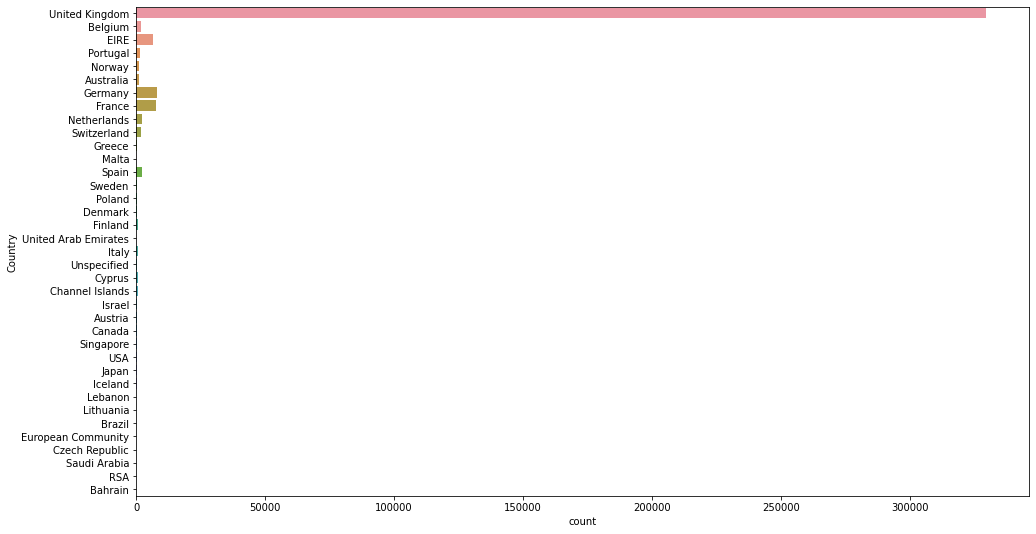

In [ ]:
f, ax = plt.subplots(figsize=(16, 9))
sns.countplot(y='Country', data=cdf_train)

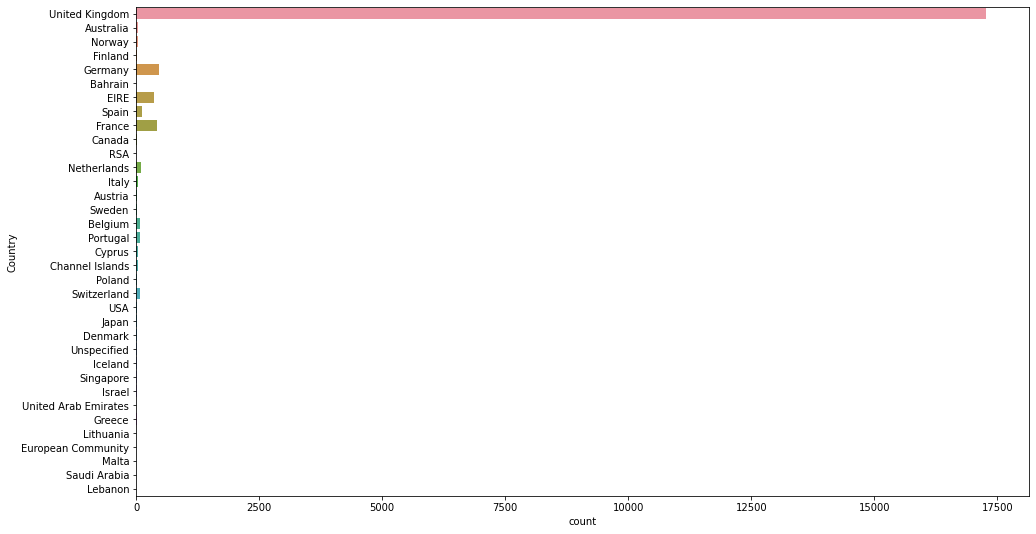

In [ ]:
f, ax = plt.subplots(figsize=(16, 9))
sns.countplot(y='Country', data=cdf_test)

In [ ]:
customer_train = cdf_train[['CustomerID', 'InvoiceNo']].groupby(['CustomerID']).count()
customer_test = cdf_test[['CustomerID', 'InvoiceNo']].groupby(['CustomerID']).count()

In [ ]:
otc_train = customer_train[customer_train['InvoiceNo']==1]
otc_test = customer_test[customer_test['InvoiceNo']==1]
repeat_train = customer_train[customer_train['InvoiceNo']!=1]
repeat_test = customer_test[customer_test['InvoiceNo']!=1]

In [ ]:
no_train = [len(otc_train), len(repeat_train)]
no_test =  [len(otc_test), len(repeat_test)]
no_train, no_test

([71, 4241], [799, 2479])

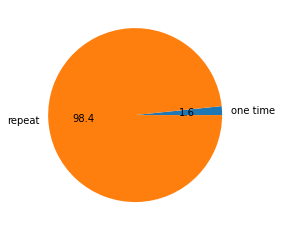

In [ ]:
plt.pie(no_train, labels=['one time', 'repeat'], autopct="%1.1f")
plt.show()
#65% repeated, 35% one time

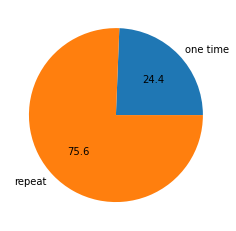

In [ ]:
plt.pie(no_test, labels=['one time', 'repeat'], autopct="%1.1f")
plt.show()

In [ ]:
temp_df = cdf_train
temp_df['Month'] = temp_df['InvoiceDate'].dt.month
temp_df['NoSales'] = 1
temp_df['TotalAmount'] = temp_df['Quantity'] * temp_df['UnitPrice']
seasonality = temp_df[['Month', 'DayOfWeek', 'Quantity', 'TotalAmount', 'NoSales']].groupby(by=['Month', 'DayOfWeek']).sum().apply(list)
seasonality['AvgPrice'] = seasonality['TotalAmount'] / seasonality['Quantity']
seasonality.reset_index()
ht_map = pd.DataFrame(seasonality.to_records())

In [ ]:
ht_map_pivot = ht_map.pivot('DayOfWeek', 'Month', 'AvgPrice')

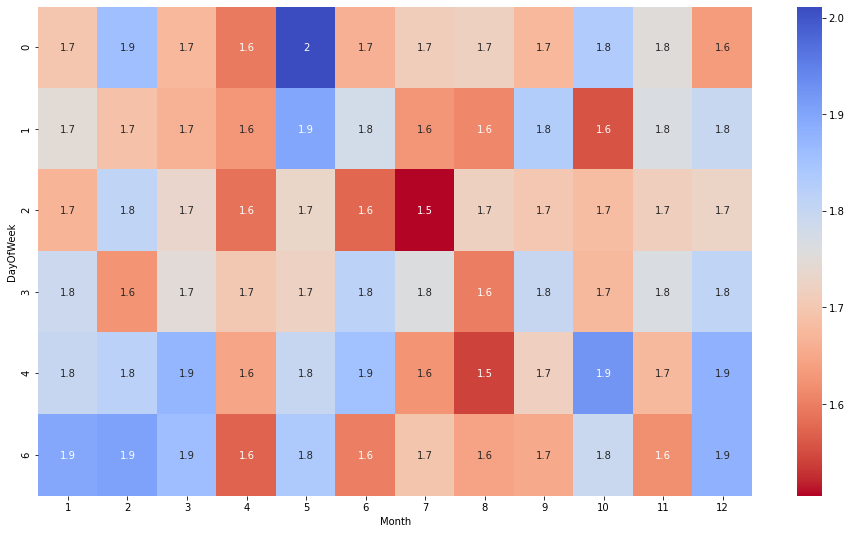

In [ ]:
f, ax = plt.subplots(figsize=(16, 9))
sns.heatmap(ht_map_pivot, annot=True, cmap='coolwarm_r')

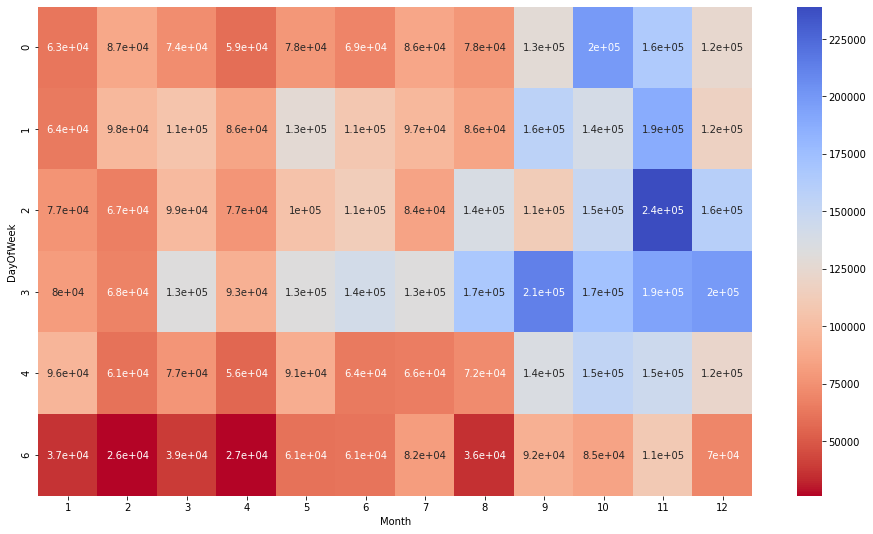

In [ ]:
ht_map_pivot2 = ht_map.pivot('DayOfWeek', 'Month', 'TotalAmount')
f, ax = plt.subplots(figsize=(16, 9))
sns.heatmap(ht_map_pivot2, annot=True, cmap='coolwarm_r')

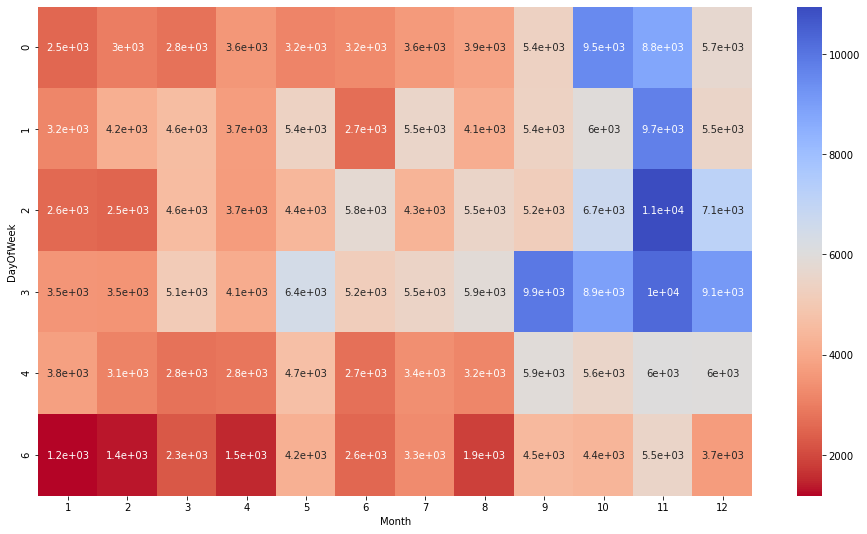

In [ ]:
temp_df = cdf_test
temp_df['Month'] = temp_df['InvoiceDate'].dt.month
temp_df['NoSales'] = 1
temp_df['TotalAmount'] = temp_df['Quantity'] * temp_df['UnitPrice']
seasonality = temp_df[['Month', 'DayOfWeek', 'Quantity', 'TotalAmount', 'NoSales']].groupby(by=['Month', 'DayOfWeek']).sum().apply(list)
seasonality['AvgPrice'] = seasonality['TotalAmount'] / seasonality['Quantity']
seasonality.reset_index()
ht_map = pd.DataFrame(seasonality.to_records())
ht_map_pivot3 = ht_map.pivot('DayOfWeek', 'Month', 'TotalAmount')
f, ax = plt.subplots(figsize=(16, 9))
sns.heatmap(ht_map_pivot3, annot=True, cmap='coolwarm_r')

In [ ]:
customer_train.sort_values(by='InvoiceNo', ascending=False).head(10)

,InvoiceNo
CustomerID,
17841.0,7280
14911.0,5226
14096.0,4706
12748.0,4137
14606.0,2538
15311.0,2249
14646.0,1932
13089.0,1734
13263.0,1596


In [ ]:
customer_test.sort_values(by='InvoiceNo', ascending=False).head(10)

,InvoiceNo
CustomerID,
17841.0,372
14911.0,296
12748.0,252
14096.0,245
14606.0,120
15311.0,116
14298.0,88
18118.0,87
14646.0,87


In [ ]:
top_10_train = cdf_train.groupby(by='Description')['Quantity'].sum().reset_index(drop=False) # StockCode
top_10_train.sort_values(by='Quantity', ascending=False).head(10)

,Description,Quantity
1736,JUMBO BAG RED RETROSPOT,41068
3732,WORLD WAR 2 GLIDERS ASSTD DESIGNS,29311
3645,WHITE HANGING HEART T-LIGHT HOLDER,29139
211,ASSORTED COLOUR BIRD ORNAMENT,28490
2239,PACK OF 72 RETROSPOT CAKE CASES,26478
3485,VICTORIAN GLASS HANGING T-LIGHT,19647
2565,POPCORN HOLDER,17906
1734,JUMBO BAG PINK POLKADOT,17531
2620,RABBIT NIGHT LIGHT,17525
1916,LUNCH BAG RED RETROSPOT,16668


In [ ]:
top_10_test = cdf_test.groupby(by='Description')['Quantity'].sum().reset_index(drop=False)
top_10_test.sort_values(by='Quantity', ascending=False).head(10)

,Description,Quantity
1222,JUMBO BAG RED RETROSPOT,1410
2581,WHITE HANGING HEART T-LIGHT HOLDER,1097
155,ASSORTED COLOUR BIRD ORNAMENT,1093
1767,POPCORN HOLDER,922
1211,JUMBO BAG 50'S CHRISTMAS,919
1220,JUMBO BAG PINK POLKADOT,918
1343,LUNCH BAG RED RETROSPOT,909
1563,PACK OF 72 RETROSPOT CAKE CASES,835
1594,PAPER CHAIN KIT 50'S CHRISTMAS,799
1337,LUNCH BAG APPLE DESIGN,776


## Feature Engineering and Transformation (2 points)

### Create new features to uncover better insights and drop the unwanted columns

* Create a new column which represents Total amount spent by each customer

    **Hint:** Quantity * UnitPrice

* Customer IDs are seen to be repeated. Maintain unique customer IDs by grouping and summing up all possible observations per customer.

    **Hint:** [pandas.groupby.agg](https://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.core.groupby.DataFrameGroupBy.agg.html)

**Note:** Perform the above operations in function, to reuse and apply the same for test data

In [ ]:
cdf_train['Month'] = cdf_train["InvoiceDate"].dt.month
cdf_train['Day'] = cdf_train["InvoiceDate"].dt.day

In [ ]:
cdf_train['SaleAmount'] = cdf_train['Quantity'] * cdf_train['UnitPrice']
customer = cdf_train.groupby(by=['CustomerID', 'DayOfWeek', 'Month'], as_index=False).agg({'Quantity':'sum', 'UnitPrice': 'mean', 'TotalAmount':'sum', 'InvoiceNo':'count' }).reset_index()
del customer['index']
customer

,CustomerID,DayOfWeek,Month,Quantity,UnitPrice,TotalAmount,InvoiceNo
0,12347.0,0,10,664,2.539348,1246.92,46
1,12347.0,1,8,277,3.101818,584.91,22
2,12347.0,1,12,291,2.908889,644.29,27
3,12347.0,2,1,281,2.516154,427.49,26
4,12347.0,2,12,172,1.312000,216.42,10
...,...,...,...,...,...,...,...
15375,18283.0,3,11,62,1.784211,110.35,57
15376,18283.0,6,1,66,1.863636,105.30,44
15377,18287.0,2,10,984,1.178378,988.72,37
15378,18287.0,4,10,108,0.643333,70.68,3


In [ ]:
customer.dtypes

CustomerID      object
DayOfWeek        int64
Month            int64
Quantity         int64
UnitPrice      float64
TotalAmount    float64
InvoiceNo        int64
dtype: object

In [ ]:
def create_features(df):
  # create new column
  df['SaleAmount'] = df['Quantity'] * df['UnitPrice']

  # create another dataset grouped by customer
  customer = df.groupby(by=['CustomerID', 'DayOfWeek']).agg({'UnitPrice': 'mean', 'TotalAmount':'mean'}).reset_index() #Quantity

  return customer

In [ ]:
train_customer = create_features(cdf_train)
test_customer = create_features(cdf_test)

In [ ]:
train_customer

,CustomerID,DayOfWeek,UnitPrice,TotalAmount
0,12347.0,0,2.539348,27.106957
1,12347.0,1,2.995510,25.085714
2,12347.0,2,2.181667,17.886389
3,12347.0,3,2.697750,24.294250
4,12348.0,1,0.790000,59.085000
...,...,...,...,...
9758,18283.0,3,1.656198,2.280958
9759,18283.0,6,1.863636,2.393182
9760,18287.0,2,1.178378,26.722162
9761,18287.0,4,0.643333,23.560000


In [ ]:
test_customer

,CustomerID,DayOfWeek,UnitPrice,TotalAmount
0,12347.0,0,3.9500,47.4000
1,12347.0,1,2.7625,16.8750
2,12347.0,2,2.0425,14.0750
3,12347.0,3,4.0000,23.5000
4,12349.0,0,7.4560,22.5080
...,...,...,...,...
6231,18283.0,1,1.7300,2.2200
6232,18283.0,2,1.2450,2.3725
6233,18283.0,3,1.7740,2.0960
6234,18287.0,2,2.1000,12.6000


### Scale the data

Apply `StandardScaler` on the features.

In [ ]:
train_customer.drop(columns='CustomerID', inplace=True)
scaler = StandardScaler()
scaler.fit(train_customer)
X_train = scaler.transform(train_customer)

In [ ]:
#train_customer.drop(columns='CustomerID', inplace=True)
scaler = StandardScaler()
scaler.fit(train_customer)
X_train = scaler.transform(train_customer)

In [ ]:
test_customer.drop(columns='CustomerID', inplace=True)
scaler.fit(test_customer)
X_test = scaler.transform(test_customer)

In [ ]:
X_train[:5, :]

array([[-1.37146123, -0.2845798 , -0.0712205 ],
       [-0.8277221 ,  0.03467282, -0.10126791],
       [-0.28398298, -0.53490874, -0.20829175],
       [ 0.25975615, -0.17371947, -0.11303368],
       [-0.8277221 , -1.50888916,  0.40415917]])

## Clustering ( 5 points)

### Apply k-means algorithm to identify a specific number of clusters


* Fit the k-means model

* Extract and store the cluster centroids

Below are the parameters for k-means, which are helpful

**n_clusters** is no. of clusters specified

**k-means++** is a random initialization method for centroids to avoid random initialisation trap

**max_iter** is max no of iterations defined when k-means is running

**n_init** is no. of times k-means will run with different initial centroids

[why-is-k-means-slower-than-random-initialization-k-means](https://stats.stackexchange.com/questions/185396/why-is-k-means-slower-than-random-initialization-k-means/185422)

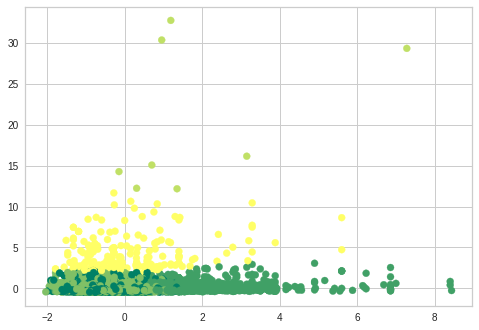

In [ ]:
# YOUR CODE HERE to apply KMeans
kmeans = KMeans(n_clusters=5, random_state=1)
y_predict = kmeans.fit_predict(X_train)

plt.scatter(X_train[:,1], X_train[:,2], c=y_predict, cmap = 'summer')
plt.show()

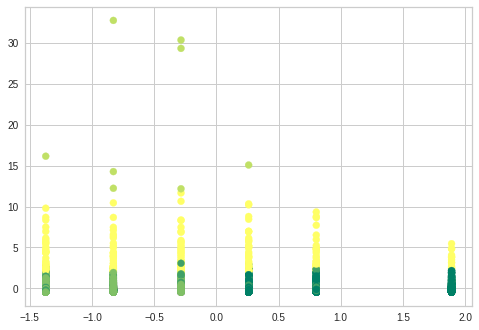

In [ ]:
plt.scatter(X_train[:,0], X_train[:,2], c=y_predict, cmap = 'summer')
plt.show()

In [ ]:
kmeans.labels_

array([2, 2, 2, ..., 2, 0, 0], dtype=int32)

In [ ]:
train_customer['Cluster'] = kmeans.labels_

In [ ]:
df_train_result = train_customer.groupby('Cluster').mean()
df_train_result.head()

,DayOfWeek,UnitPrice,TotalAmount
Cluster,,,
0,4.176560,2.522494,22.255937
1,2.411056,5.440041,34.594982
2,1.002881,2.498142,23.216515
3,1.500000,5.590625,1395.513500
4,2.268182,2.952492,302.877363


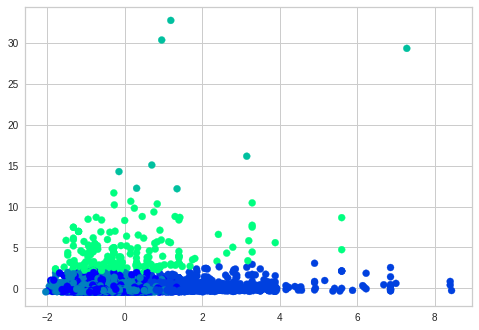

In [ ]:
plt.scatter(X_train[:,1], X_train[:,2], c=y_predict, cmap = 'winter')

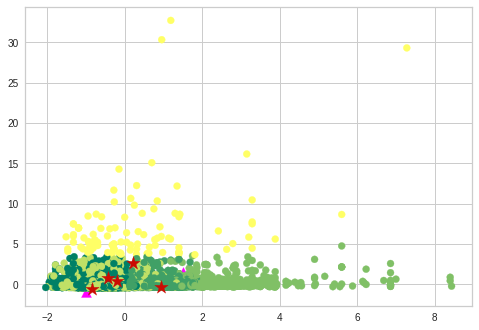

In [ ]:
# Perform k-means clustering with specified centroids
good_init = np.array([[-1, -1, -1], [0, 0, 0], [0.5, 0.5, 0.5], [0.25, 0.25, 0.25], [1.5, 1.5, 1.5]])
#kmeans = KMeans(n_clusters = 3, init = good_init, n_init = 1, random_state = 1)
kmeans = KMeans(n_clusters = 5, init = good_init, n_init = 1, random_state = 1)
# Make prediction using only two features, as centroids are specified for only two features
y_predict = kmeans.fit_predict(X_train)

# Plot initial centroids
plt.scatter(x = [-1, 0, 1.5], y = [-1, 0, 1.5], c = 'magenta', s = 100, marker= "^")
# Plot data points
plt.scatter(X_train[:,1], X_train[:,2], c = y_predict, cmap = 'summer')
# Plot centroids after iteration
plt.scatter(x = kmeans.cluster_centers_[:,0], y = kmeans.cluster_centers_[:,1], c = 'r', marker="*", s = 200)
plt.show()

In [ ]:
# Model's inertia
kmeans.inertia_

11573.140572957867

#### Find the optimal number of clusters (K) by using the [Elbow method](https://pythonprogramminglanguage.com/kmeans-elbow-method/).

Use the optimal no. of clusters and store the cluster centroids

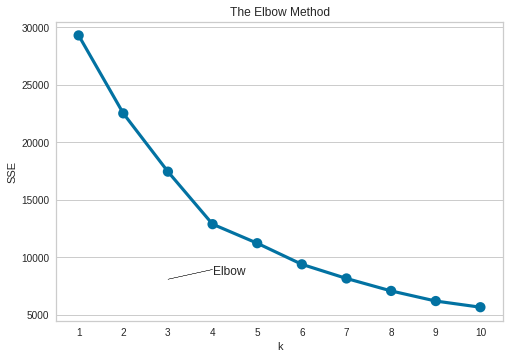

In [ ]:
# YOUR CODE HERE
sse = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train)
    sse[k] = kmeans.inertia_
plt.title('The Elbow Method')
plt.xlabel('k')
plt.ylabel('SSE')
plt.arrow(2, 8100, 1, 850)
plt.text(3, 8500, "Elbow", fontdict={'size': 12})
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

Optimal number of clusters n_clusters = 5 since the graph becomes linear from that point.

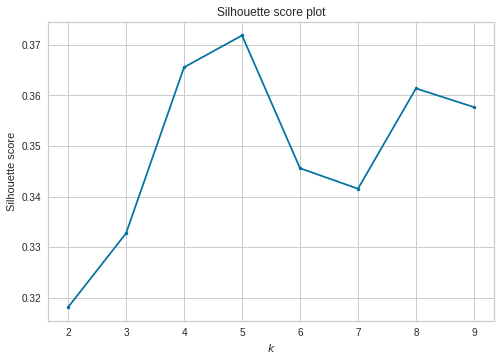

In [ ]:
# Plot Silhouette score plot
from sklearn.metrics import silhouette_score
clusters = np.arange(2,10)
sil_score = []
for c in clusters:
    kmeans = KMeans(n_clusters = c, random_state=1)
    kmeans.fit(X_train)
    sil_score.append(silhouette_score(X_train, kmeans.labels_))
plt.plot(clusters, sil_score, marker= '.')
plt.title('Silhouette score plot')
plt.xlabel("$k$")
plt.ylabel("Silhouette score")
plt.show()

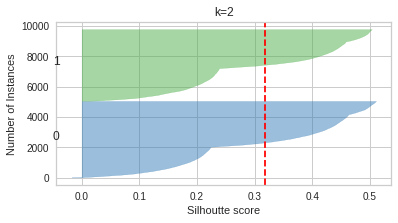

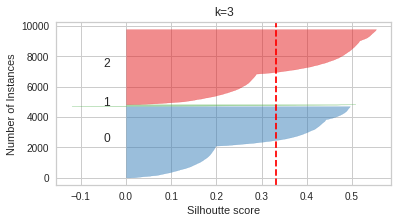

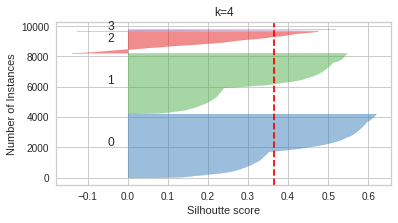

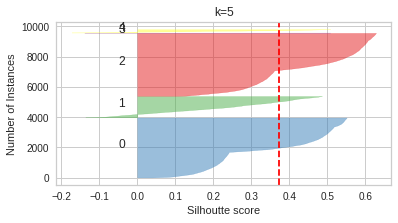

In [ ]:
# Plot Silhouette Diagram
from yellowbrick.cluster import SilhouetteVisualizer
clusters = [2, 3, 4, 5]
for c in clusters:
    plt.figure(figsize=(6, 3))
    # Instantiate the clustering model and visualizer
    kmeans = KMeans(c, random_state=1)
    # Instantiate SilhouetteVisualizer()
    visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
    # Fit the data to the visualizer
    visualizer.fit(X_train);
    plt.title("k={}".format(c))
    plt.xlabel("Silhoutte score")
    plt.ylabel("Number of Instances")
    plt.show()

### Apply DBSCAN algorithm for clustering

- Compare the results of clusters from k-means and DBSCAN


In [ ]:
dbscan = DBSCAN(eps=0.3, min_samples=7)
dbscan.fit(X_train)
print("Unique clusters in data: ", np.unique(dbscan.labels_))

Unique clusters in data:  [-1  0  1  2  3  4  5  6  7  8  9 10 11 12]


### Analyze the clusters


- consider two features and visualize the clusters with different colors using the predicted cluster centers.

  **Hint:** 2D plot

- consider three features and visualize the clusters with different colors using the predicted cluster centers.

  **Hint:** [3D plot](https://matplotlib.org/stable/gallery/mplot3d/scatter3d.html
)

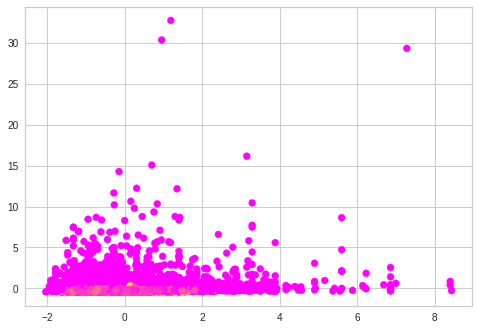

In [ ]:
plt.scatter(X_train[:,1], X_train[:,2], c = dbscan.labels_, cmap= "spring")

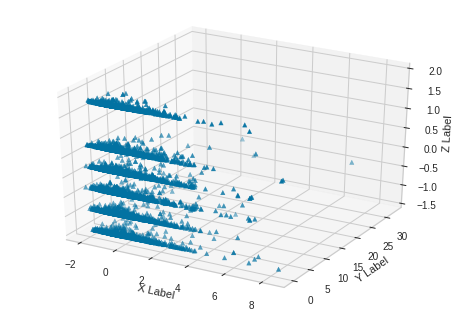

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X_train[:,1], X_train[:,2], X_train[:,0], marker='^')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

### Train a supervised algorithm on clustered data

This will allow us to predict cluster numbers (label) for each test data instance

* Create labelled data with k-means cluster labels
  
  **Hint**: [`kmeans.labels_`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
)
* Split the data into train and validation sets
* Train a supervised algorithm on the train data
* Find the accuracy of the model using validation data

In [ ]:
df_train_result.head()

,DayOfWeek,UnitPrice,TotalAmount
Cluster,,,
0,4.176560,2.522494,22.255937
1,2.411056,5.440041,34.594982
2,1.002881,2.498142,23.216515
3,1.500000,5.590625,1395.513500
4,2.268182,2.952492,302.877363


In [ ]:
df_train_result.index

Int64Index([0, 1, 2, 3, 4], dtype='int64', name='Cluster')

In [ ]:
df_train_result.shape

(5, 3)

In [ ]:
train_customer.head()

,DayOfWeek,UnitPrice,TotalAmount,Cluster
0,0,2.539348,27.106957,2
1,1,2.995510,25.085714,2
2,2,2.181667,17.886389,2
3,3,2.697750,24.294250,0
4,1,0.790000,59.085000,2


In [ ]:
train_customer.iloc[ :, :3]

,DayOfWeek,UnitPrice,TotalAmount
0,0,2.539348,27.106957
1,1,2.995510,25.085714
2,2,2.181667,17.886389
3,3,2.697750,24.294250
4,1,0.790000,59.085000
...,...,...,...
9758,3,1.656198,2.280958
9759,6,1.863636,2.393182
9760,2,1.178378,26.722162
9761,4,0.643333,23.560000


In [ ]:
train_customer.iloc[ :, 3]

0       2
1       2
2       2
3       0
4       2
       ..
9758    0
9759    0
9760    2
9761    0
9762    0
Name: Cluster, Length: 9763, dtype: int32

In [ ]:
X = StandardScaler().fit_transform(train_customer.iloc[ :, :3])
X_train, X_test, y_train, y_test = train_test_split(X, train_customer.iloc[ :, 3],test_size = 0.25, random_state=123)

In [ ]:
# YOUR CODE HERE
from sklearn.neighbors import KNeighborsClassifier
# Training KNeighborsClassifier on core instances
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

### Evaluation of Test Data
* Use the model to predict the labels for the Test data below
* Format the test data in the same format as the train data.
* Predict it with trained supervised ML model

In [ ]:
# Test set provided as below
# test = pd.read_csv("Online_Retail_Test.csv")
# test.head(3)
# test data has already been cleaned up, so not called again here

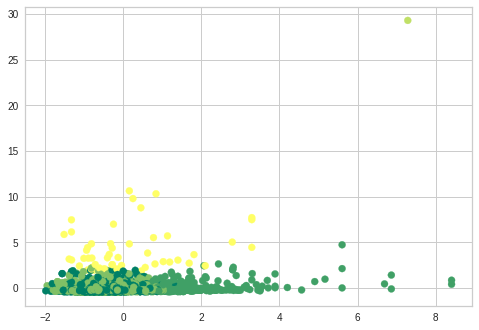

In [ ]:
y_predict = knn.predict(X_test)
plt.scatter(X_test[:, 1], X_test[:, 2], c=y_predict, cmap = 'summer')
plt.show()

In [ ]:
test_customer.iloc[ :, :3]

,DayOfWeek,UnitPrice,TotalAmount
0,0,3.9500,47.4000
1,1,2.7625,16.8750
2,2,2.0425,14.0750
3,3,4.0000,23.5000
4,0,7.4560,22.5080
...,...,...,...
6231,1,1.7300,2.2200
6232,2,1.2450,2.3725
6233,3,1.7740,2.0960
6234,2,2.1000,12.6000


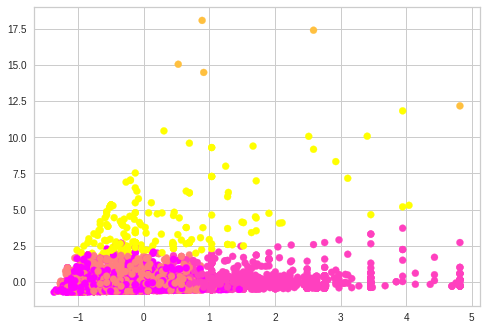

In [ ]:
X_TEST = StandardScaler().fit_transform(test_customer.iloc[ :, :3])
y_predict_test = knn.predict(X_TEST)
plt.scatter(X_TEST[:, 1], X_TEST[:, 2], c=y_predict_test, cmap = 'spring')
plt.show()